# Exercise 04


# Part 1 - Linear Regression

Estimate a regression using the Income data


## Forecast of income

We'll be working with a dataset from US Census indome ([data dictionary](https://archive.ics.uci.edu/ml/datasets/Adult)).

Many businesses would like to personalize their offer based on customer’s income. High-income customers could be, for instance, exposed to premium products. As a customer’s income is not always explicitly known, predictive model could estimate income of a person based on other information.

Our goal is to create a predictive model that will be able to output an estimation of a person income.

In [13]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
income = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/income.csv.zip', index_col=0)

income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0


In [2]:
income.shape

(32561, 15)

# Exercise 4.1 

What is the relation between the age and Income?

For a one percent increase in the Age how much the income increases?

Using sklearn estimate a linear regression and predict the income when the Age is 30 and 40 years

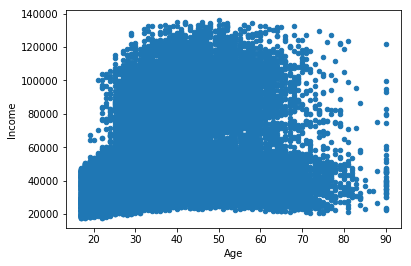

In [3]:
income.plot(x='Age', y='Income', kind='scatter')

## Relación entre Ingreso y Edad

In [4]:
from scipy.stats.stats import pearsonr

In [6]:
pearsonr(income['Age'], income['Income'])

(0.2904082980024351, 0.0)

Como se ve evidenciado por el Coeficiente de correlación de 0,29 y el gráfico de dispersión que no muestra ningún tipo de tendencia, las variables edad e ingreso no poseen un alto grado de relación.

## Regresión modelo OLS

In [25]:
import pandas as pd
import numpy as np

In [48]:
y = income['Income']
x = income['Age']
y_mean, y_std = y.mean(), y.std()
x_mean, x_std = x.mean(), x.std()

y = (y - y_mean)/ y_std
x = (x - x_mean)/ x_std
n_samples = x.shape[0]
X = np.c_[np.ones(n_samples), x]

In [49]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(fit_intercept=False)
linreg.fit(X, y)
linreg.coef_

array([8.06661382e-17, 2.90408298e-01])

## Predicción modelos OLS

In [55]:
# Definición función predicción
def lr_h(beta,x):
    return np.dot(beta, x.T)

# Predicción edad=30
x1 = np.array([30])
# Estandarizar x1
x1_scaled = (x1 - x_mean)/ x_std
x1_ = np.c_[1, x1_scaled]
y_pred1 = lr_h(linreg.coef_,x1_)
y_pred1 = y_pred1 * y_std + y_mean
y_pred1

array([48803.11784304])

Se espera que el ingreso estimado de una persona de 30 años sea 48.803 según la predicción del modelo con la metodología OLS.

In [56]:
# Predicción edad=40
x2 = np.array([40])
# Estandarizar x2
x2_scaled = (x2 - x_mean)/ x_std
x2_ = np.c_[1, x2_scaled]
y_pred2 = lr_h(linreg.coef_,x2_)
y_pred2 = y_pred2 * y_std + y_mean
y_pred2

array([54224.79441376])

Se espera que el ingreso estimado de una persona de 40 años sea 54.224 según la predicción del modelo con la metodología OLS.

## Regresión modelo SGD

In [69]:
from sklearn.linear_model import SGDRegressor
linreg2 = SGDRegressor(fit_intercept=False, max_iter=500,tol = 0.0000001)
y = income['Income']
x = income['Age']
y_mean, y_std = y.mean(), y.std()
X_mean, X_std = x.mean(), x.std()

y = (y - y_mean)/ y_std
x = (x - x_mean)/ x_std
n_samples = x.shape[0]
x_ = np.c_[np.ones(n_samples), x]

linreg2.fit(x_, y)
linreg2.coef_

array([-0.00844612,  0.28269976])

## Predicción modelo SGD

In [61]:
# Predicción edad=30
x1 = np.array([30])
# Estandarizar x1
x1_scaled = (x1 - x_mean)/ x_std
x1_ = np.c_[1, x1_scaled]
y_pred1 = lr_h(linreg2.coef_,x1_)
y_pred1 = y_pred1 * y_std + y_mean
y_pred1

array([48644.48606906])

Se espera que el ingreso estimado de una persona de 30 años sea 48.644 según la predicción del modelo con la metodología SGD.

In [67]:
# Predicción edad=40
x2 = np.array([40])
# Estandarizar x2
x2_scaled = (x2 - x_mean)/ x_std
x2_ = np.c_[1, x2_scaled]
y_pred2 = lr_h(linreg2.coef_,x2_)
y_pred2 = y_pred2 * y_std + y_mean
y_pred2

array([54517.25692202])

Se espera que el ingreso estimado de una persona de 40 años sea 54.517 según la predicción del modelo con la metodología SGD.

# Exercise 4.2
Evaluate the model using the MSE

## MSE para el modelo OLS

In [73]:
y = income['Income']
x = income['Age']
x_ = np.c_[np.ones(n_samples), x]
clf1 = LinearRegression()
clf1.fit(x_, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [74]:
y_pred = clf1.predict(x_)

In [75]:
from sklearn import metrics
import numpy as np

print('MSE metodología OLS:', metrics.mean_squared_error(y, y_pred))


MSE metodología OLS: 593783043.8402299


## MSE para el modelo SGD

In [76]:
y = income['Income']
x = income['Age']
x_ = np.c_[np.ones(n_samples), x]
clf2 = SGDRegressor( max_iter=10000,tol=None)
clf2.fit(x_, y)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=10000, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [77]:
y_pred2 = clf2.predict(x_)
print('MSE metodología SGD:', metrics.mean_squared_error(y, y_pred2))

MSE metodología SGD: 615751644.0479655


Para la estructura del modelo, la metodología OLS proporciona una mejor precisión en las predicciones evaluada bajo la metodología MSE.


# Exercise 4.3

Run a regression model using as features the Age and Age$^2$ using the OLS equations

In [6]:
y = income['Income']
income['Age2'] = income['Age'] ** 2
x = income[['Age','Age2']]
# Estandarización de las variables del modelo
y_mean, y_std = y.mean(), y.std()
x_mean, x_std = x.mean(), x.std()

y = (y - y_mean)/ y_std
x = (x - x_mean)/ x_std
n_samples = x.shape[0]
X = np.c_[np.ones(n_samples), x]

In [8]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(fit_intercept=False)
linreg.fit(X, y)
linreg.coef_

array([ 8.06661382e-17,  1.67751068e+00, -1.41415206e+00])

# Exercise 4.4


Estimate a regression using more features.

How is the performance compared to using only the Age?

## Estimación metodología OLS

In [18]:
y = income['Income']
x = income[['Age','Education-Num','Capital Gain','Hours per week']]
# Estandarización
y_mean, y_std = y.mean(), y.std()
x_mean, x_std = x.mean(), x.std()
y = (y - y_mean)/ y_std
x = (x - x_mean)/ x_std

In [19]:
n_samples = x.shape[0]
income['Sex']=income.Sex.map({'Female':0,'Male':1}) #Definición Dummy Genero
income['Sex_Ed']=income['Sex']*income['Education-Num']#Definición Interacción
X = np.c_[np.ones(n_samples), x,income['Sex'],income['Sex_Ed']]

In [21]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(fit_intercept=False)
linreg.fit(X, y)
linreg.coef_

array([-0.53906608,  0.22353744,  0.30178727,  0.12026301,  0.11662529,
        0.34463816,  0.04561994])

## Estimación Metodología SGD

In [22]:
from sklearn.linear_model import SGDRegressor
linreg2 = SGDRegressor(fit_intercept=False, max_iter=500,tol = 0.0000001)
linreg2.fit(X, y)
linreg2.coef_

array([-0.53007559,  0.22998012,  0.31015132,  0.10730813,  0.11113328,
        0.26416618,  0.04944548])

## Diferencia entre las estimaciones

In [23]:
linreg.coef_ -linreg2.coef_

array([-0.00899048, -0.00644267, -0.00836405,  0.01295488,  0.00549201,
        0.08047198, -0.00382554])

## Precisión estimación metodología OLS (MSE)

In [31]:
income = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/income.csv.zip', index_col=0)
y = income['Income']
income['Sex']=income.Sex.map({'Female':0,'Male':1}) #Definición Dummy Genero
income['Sex_Ed']=income['Sex']*income['Education-Num']#Definición Interacción con años de Educación.
x = income[['Age','Education-Num','Capital Gain','Hours per week','Sex','Sex_Ed']]

In [32]:
x_ = np.c_[np.ones(n_samples), x]
clf1 = LinearRegression()
clf1.fit(x_, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
y_pred = clf1.predict(x_)
from sklearn import metrics
import numpy as np
print('MAE metodología OLS:', metrics.mean_absolute_error(y, y_pred))
print('MSE metodología OLS:', metrics.mean_squared_error(y, y_pred))
print('RMSE metodología OLS:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

MAE metodología OLS: 14233.221088427295
MSE metodología OLS: 351551140.6563434
RMSE metodología OLS: 18749.69708172224


## Precisión estimación metodología SGD (MSE)

In [34]:
income = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/income.csv.zip', index_col=0)
y = income['Income']
income['Sex']=income.Sex.map({'Female':0,'Male':1}) #Definición Dummy Genero
income['Sex_Ed']=income['Sex']*income['Education-Num']#Definición Interacción con años de Educación.
x = income[['Age','Education-Num','Capital Gain','Hours per week','Sex','Sex_Ed']]
x_ = np.c_[np.ones(n_samples), x]
clf2 = SGDRegressor( max_iter=10000,tol=None)
clf2.fit(x_, y)
y_pred2 = clf2.predict(x_)
print('MAE metodología SGD:', metrics.mean_absolute_error(y, y_pred2))
print('MSE metodología SGD:', metrics.mean_squared_error(y, y_pred2))
print('RMSE metodología SGD:', np.sqrt(metrics.mean_squared_error(y, y_pred2)))

MAE metodología SGD: 3729869430862505.0
MSE metodología SGD: 6.672619523616022e+32
RMSE metodología SGD: 2.583141406043429e+16


# Part 2: Logistic Regression

### Customer Churn: 
losing/attrition of the customers from the company. Especially, the industries that the user acquisition is costly, it is crucially important for one company to reduce and ideally make the customer churn to 0 to sustain their recurring revenue. If you consider customer retention is always cheaper than customer acquisition and generally depends on the data of the user(usage of the service or product), it poses a great/exciting/hard problem for machine learning.

### Data
Dataset is from a telecom service provider where they have the service usage(international plan, voicemail plan, usage in daytime, usage in evenings and nights and so on) and basic demographic information(state and area code) of the user. For labels, I have a single data point whether the customer is churned out or not.


In [196]:
import pandas as pd
import numpy as np
# Download the dataset
data = pd.read_csv('https://github.com/ghuiber/churn/raw/master/data/churn.csv')

# Exercise 4.5

Create Y and X

What is the distribution of the churners?

Split the data in train (70%) and test (30%)


In [176]:
# Codificando la variable Churn
data['Churn'] = np.where(data['Churn?'] == 'False.', 0, 1)

In [188]:
from pandas.tools.plotting import scatter_matrix 
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

C:\Users\A0685215\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


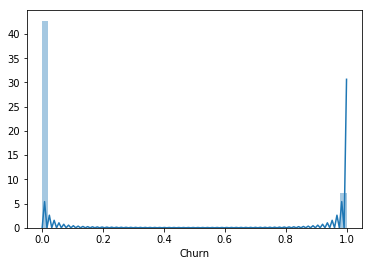

In [15]:
sb.distplot(data['Churn'])

La distribución de la variable Churn (Codificada) es Binomial según la gráfica anterior.

In [190]:
data1=data[['Day Calls','Eve Calls','Night Calls','CustServ Calls','Churn','Intl Charge']]

In [197]:
from sklearn.model_selection import train_test_split
# creación de training and testing base de datos
x_train, x_test= train_test_split(data1, test_size=0.3)

In [198]:
x_train1=x_train.apply(lambda col: col.reset_index(drop=True))

# Exercise 4.6

Train a Logistic Regression using the training set and apply the algorithm to the testing set.

In [199]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear',C=1e9)
feature_cols = ['CustServ Calls']
X = x_train1[feature_cols]
y = x_train1.Churn
logreg.fit(X, y)


LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [208]:
### prueba con X_test
x_test1 = x_test.apply(lambda col: col.reset_index(drop=True))
feature_cols = ['CustServ Calls']
X1 = x_test1[feature_cols]

In [209]:
x_test1['Churn_pred_class'] = logreg.predict(X1)

Text(0,0.5,'Churn_pred_class')

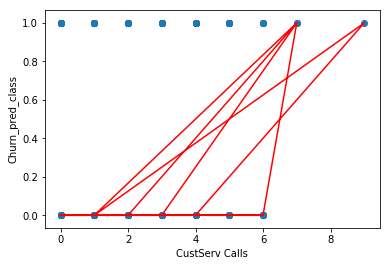

In [210]:
# plot the class predictions
plt.scatter(x_test1['CustServ Calls'], x_test1.Churn)
plt.plot(x_test1['CustServ Calls'], x_test1.Churn_pred_class, color='red')
plt.xlabel('CustServ Calls')
plt.ylabel('Churn_pred_class')

In [213]:
x_test1['Churn_pred_prob'] = logreg.predict_proba(X1)[:, 1]

Text(0,0.5,'Churn_pred_prob')

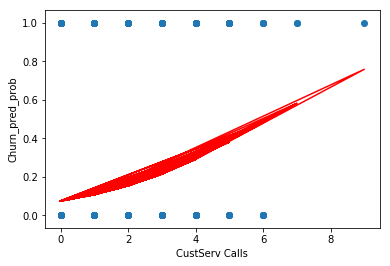

In [214]:
# plot the predicted probabilities
plt.scatter(x_test1['CustServ Calls'], x_test1.Churn)
plt.plot(x_test1['CustServ Calls'], x_test1.Churn_pred_prob, color='red')
plt.xlabel('CustServ Calls')
plt.ylabel('Churn_pred_prob')

# Exercise 4.7

a) Create a confusion matrix using the prediction on the 30% set.

b) Estimate the accuracy of the model in the 30% set


In [221]:
print(logreg.predict_proba([[0]]))
print(logreg.predict_proba([[1]]))
print(logreg.predict_proba([[2]]))
print(logreg.predict_proba([[3]]))
print(logreg.predict_proba([[4]]))
print(logreg.predict_proba([[5]]))
print(logreg.predict_proba([[6]]))
print(logreg.predict_proba([[7]]))

[[0.92556226 0.07443774]]
[[0.89216793 0.10783207]]
[[0.84628034 0.15371966]]
[[0.78555902 0.21444098]]
[[0.70909689 0.29090311]]
[[0.6186077 0.3813923]]
[[0.51906169 0.48093831]]
[[0.41797899 0.58202101]]


## Matriz de Confusión

In [246]:
 Con_M = pd.DataFrame([[logreg.predict_proba([[0]])], [logreg.predict_proba([[1]])], [logreg.predict_proba([[2]])],[logreg.predict_proba([[3]])],[logreg.predict_proba([[4]])],[logreg.predict_proba([[5]])],[logreg.predict_proba([[6]])],[logreg.predict_proba([[7]])],[logreg.predict_proba([[8]])],[logreg.predict_proba([[9]])]], index=['No Llamada','1 Llamada', '2 Llamadas', '3 Llamadas', '4 Llamadas','5 Llamadas','6 Llamadas','7 Llamadas','8 Llamadas','9 Llamadas'], columns= ['Prob Continua plan/ Prob Churn'])

In [247]:
Con_M

,Prob Continua plan/ Prob Churn
No Llamada,"[[0.9255622618035192, 0.0744377381964808]]"
1 Llamada,"[[0.8921679282639174, 0.1078320717360825]]"
2 Llamadas,"[[0.8462803426970613, 0.15371965730293866]]"
3 Llamadas,"[[0.7855590188477959, 0.21444098115220406]]"
4 Llamadas,"[[0.7090968922717049, 0.29090310772829503]]"
5 Llamadas,"[[0.6186077044330544, 0.38139229556694565]]"
6 Llamadas,"[[0.5190616860942343, 0.48093831390576564]]"
7 Llamadas,"[[0.4179789868902539, 0.5820210131097461]]"
8 Llamadas,"[[0.323346570704655, 0.676653429295345]]"
9 Llamadas,"[[0.2412582367415952, 0.7587417632584048]]"


## Evaluación de la predicción

In [249]:
from sklearn import metrics
print('MSE:', metrics.mean_squared_error(x_test1['Churn_pred_class'], x_test1['Churn']))

MSE: 0.1173673378578056
